In [53]:
#NGWENYA SINIKIWE R176519R
#MUJATI KUNDAI R178459R

import pandas as pd
import numpy as np
import datetime
from google.colab import drive
import tensorflow as tf
import cv2     
import math   
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   
import numpy as np   
from keras.utils import np_utils
from skimage.transform import resize   
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VIDEO.csv')
videoFile = '/content/drive/MyDrive/Colab Notebooks/Firm Faith.mp4'
videoFile1 = '/content/drive/MyDrive/Colab Notebooks/ISHE VHENEKAI.mp4'
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
count = 0
cap = cv2.VideoCapture(videoFile)   
frameRate = cap.get(5) 
x=1
while(cap.isOpened()):
    frameId = cap.get(1) 
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


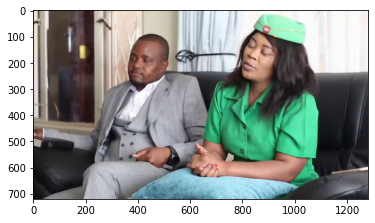

In [11]:
img = plt.imread('frame0.jpg')   # reading image 
plt.imshow(img)

In [12]:
data.head()      # first 5 rows

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [13]:
X = [ ]    
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  
X = np.array(X)    

In [14]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [15]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      
    image.append(a)
X = np.array(image)

In [16]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)      

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    

In [18]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [19]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    

58900480/58889256 [==============================] - 0s 0us/step


In [20]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((208, 7, 7, 512), (90, 7, 7, 512))

In [21]:
X_train = X_train.reshape(208, 7*7*512)      
X_valid = X_valid.reshape(90, 7*7*512)

In [22]:
train = X_train/X_train.max()      
X_valid = X_valid/X_train.max()

In [23]:
#1model_building
model = Sequential()
model.add(InputLayer((7*7*512,)))    
model.add(Dense(units=1024, activation='sigmoid')) 
model.add(Dense(3, activation='softmax'))    

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [25]:
#2model_compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
#3model_training
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
7/7 [==============================] - 9s 225ms/step - loss: 1.1808 - accuracy: 0.4576 - val_loss: 1.0736 - val_accuracy: 0.5222
Epoch 2/100
7/7 [==============================] - 1s 156ms/step - loss: 0.8822 - accuracy: 0.5708 - val_loss: 1.0235 - val_accuracy: 0.5889
Epoch 3/100
7/7 [==============================] - 1s 155ms/step - loss: 0.7942 - accuracy: 0.6533 - val_loss: 1.0234 - val_accuracy: 0.5111
Epoch 4/100
7/7 [==============================] - 1s 157ms/step - loss: 0.6709 - accuracy: 0.7238 - val_loss: 0.9946 - val_accuracy: 0.5667
Epoch 5/100
7/7 [==============================] - 1s 159ms/step - loss: 0.5578 - accuracy: 0.7902 - val_loss: 0.9116 - val_accuracy: 0.6333
Epoch 6/100
7/7 [==============================] - 1s 156ms/step - loss: 0.4995 - accuracy: 0.7830 - val_loss: 0.9065 - val_accuracy: 0.6222
Epoch 7/100
7/7 [==============================] - 1s 157ms/step - loss: 0.4284 - accuracy: 0.8573 - val_loss: 0.9772 - val_accuracy: 0.5333
Epoch 8/100
7

In [47]:
count = 0
videoFile = "ISHE VHENEKAI.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) 
x=1
while(cap.isOpened()):
    frameId = cap.get(1) 
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [48]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [49]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int) 
    test_image.append(a)
test_image = np.array(test_image)


In [50]:
#IMAGE PREPROCESSING
test_image = preprocess_input(test_image)
test_image = base_model.predict(test_image)
test_image = test_image.reshape(186, 7*7*512)
test_image = test_image/test_image.max()

In [51]:
predicting = model.predict_classes(test_image)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [52]:
print("screen_time of FIRM FAITH is", predicting[predicting==1].shape[0], "secs")
print("screen_time of ISHE VHENEKAI is", predicting[predicting==2].shape[0], "secs")

screen_time of FIRM FAITH is 45 secs
screen_time of ISHE VHENEKAI is 86 secs
